In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from lightgbm import LGBMClassifier

from mlxtend.classifier import StackingClassifier
from mlxtend.classifier import StackingCVClassifier

from sklearn.svm import SVC
from sklearn import metrics

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier as ada
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier as RF

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score, precision_score, recall_score


In [2]:
#  Voting
data = pd.read_excel('D://workspace//mathematical_modeling//CUMCM2022//solver//excel//extract//3//data.xlsx')
# data = pd.read_csv('D://workspace//mathematical_modeling//test_2//solver//excel//extract//1//第一问特征提取.csv',
#                    encoding='utf-8',
#                    index_col='企业代号')
data=data.fillna('0')
data

,文物采样点,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),类型
0,07,1,92.63,0,0,1.07,0,1.98,0.17,3.24,0,0,0.61,0,0,0,0
1,09,1,95.02,0,0.59,0.62,0,1.32,0.32,1.55,0,0,0.35,0,0,0,0
2,10,1,96.77,0,0.92,0.21,0,0.81,0.26,0.84,0,0,0,0,0,0,0
3,12,1,94.29,0,1.01,0.72,0,1.46,0.29,1.65,0,0,0.15,0,0,0,0
4,22,1,92.35,0,0.74,1.66,0.64,3.50,0.35,0.55,0,0,0.21,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,37,0,60.12,0,0.23,0.89,0,2.72,0,3.01,17.24,10.34,1.46,0.31,0,3.66,1
62,45,0,61.28,2.66,0.11,0.84,0.74,5.00,0,0.53,15.99,10.96,0,0.23,0,0,1
63,46,0,55.21,0,0.25,0,1.67,4.79,0,0.77,25.25,10.06,0.2,0.43,0,0,1
64,47,0,51.54,4.66,0.29,0.87,0.61,3.06,0,0.65,25.4,9.23,0.1,0.85,0,0,1


In [3]:
data.describe()

,表面风化,二氧化硅(SiO2),氧化铝(Al2O3),类型
count,66.000000,66.000000,66.000000,66.000000
mean,0.636364,48.603182,4.008182,0.742424
std,0.484732,24.257757,3.079029,0.440650
min,0.000000,3.720000,0.450000,0.000000
25%,0.000000,28.880000,1.855000,0.250000
50%,1.000000,51.295000,3.370000,1.000000
75%,1.000000,64.800000,5.347500,1.000000
max,1.000000,96.770000,14.340000,1.000000


In [4]:
x=data.loc[:,'表面风化':'二氧化硫(SO2)']
print(x.shape)
print(x)

(66, 15)
    表面风化  二氧化硅(SiO2) 氧化钠(Na2O) 氧化钾(K2O) 氧化钙(CaO) 氧化镁(MgO)  氧化铝(Al2O3)  \
0      1       92.63         0        0     1.07        0        1.98   
1      1       95.02         0     0.59     0.62        0        1.32   
2      1       96.77         0     0.92     0.21        0        0.81   
3      1       94.29         0     1.01     0.72        0        1.46   
4      1       92.35         0     0.74     1.66     0.64        3.50   
..   ...         ...       ...      ...      ...      ...         ...   
61     0       60.12         0     0.23     0.89        0        2.72   
62     0       61.28      2.66     0.11     0.84     0.74        5.00   
63     0       55.21         0     0.25        0     1.67        4.79   
64     0       51.54      4.66     0.29     0.87     0.61        3.06   
65     0       49.01      2.71        0     1.13        0        1.45   

   氧化铁(Fe2O3) 氧化铜(CuO) 氧化铅(PbO) 氧化钡(BaO) 五氧化二磷(P2O5) 氧化锶(SrO) 氧化锡(SnO2)  \
0        0.17     3.24        0        

In [5]:
y=data.loc[:,'类型']
print(y.shape)
print(y)

(66,)
0     0
1     0
2     0
3     0
4     0
     ..
61    1
62    1
63    1
64    1
65    1
Name: 类型, Length: 66, dtype: int64


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    train_size=0.8,
                                                    random_state=20,
                                                    shuffle=True)

# (x - u) / s  归一化
tranfer = StandardScaler()
x = tranfer.fit_transform(x)
x_train = tranfer.transform(x_train)
x_test = tranfer.transform(x_test)
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(66, 15)
(52, 15)
(14, 15)


In [7]:
# init model

# lightGBM适合较大数据集的样本
# 而对于较小的数据集(<10000条记录)，lightGBM可能不是最佳选择。所以，如果进行调优lightgbm参数，这可能没有帮助。
lgb = LGBMClassifier(learning_rate=0.005,n_estimators=10,objective='binary',
                           boosting_type='gbdt',
                           num_leaves=2**5,
                           max_depth=5,reg_alpha=0.5,reg_lambda=0.5,
                           metric='auc',subsample=0.75)
LR = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
Ada = ada(algorithm='SAMME', base_estimator=None, learning_rate=0.1,
                   n_estimators=100, random_state=30)
GBDT = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.7, loss='exponential', max_depth=3,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=25,
                           n_iter_no_change=None,
                           random_state=30, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
svc = SVC(C=0.8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=20, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

rf = RF(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)
#cv：设定交叉验证折数
sclf = StackingCVClassifier(classifiers=[Ada, GBDT, LR,rf],
                            use_probas=True,
                            meta_classifier=svc,
                            random_state=30,
                            cv=5)
metric_xlsx = {}
weight = []
for clf, label in zip(
    [LR, Ada, GBDT, svc, rf, sclf, lgb],
    ['LR', 'Ada', 'GBDT', 'svc', 'rf', 'StackingClassifier', 'LGBMClassifier'
     ]):
    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)

    tem_1 = [
        metrics.accuracy_score(y, clf.predict(x)),
        metrics.accuracy_score(y_train, clf.predict(x_train)),
        metrics.accuracy_score(y_test, y_predict),
        precision_score(y_test, y_predict),
        recall_score(y_test, y_predict),
        metrics.roc_auc_score(y_test,
                              clf.predict_proba(x_test)[:, 1]),
        metrics.f1_score(y_test, y_predict),
    ]

    metric_xlsx[label] = tem_1
    # tem = metrics.accuracy_score(y, clf.predict(x))
    weight.append(tem_1[0])

data2 = pd.DataFrame(data=metric_xlsx,
                     index=[
                        'total_Accuracy',
                         'train_Accuracy', 'test_Accuracy', 'Precision',
                         'Recall', 'AUC', 'f1'
                     ]).T
print(data2)

print(len(weight))
print(weight)

# 软投票
# w = weight/sum(weight)

vote2 = VotingClassifier(estimators=[('LR', LR), ('Ada', Ada), ('GBDT', GBDT),
                                     ('SVC', svc), ('rf', rf),
                                     ('StackingClassifier', sclf),
                                     ('LGBMClassifier',lgb)],
                         voting='soft',
                         weights=weight)
vote2.fit(x_train,y_train)
y_predict = vote2.predict(x_test)

print('{}在测试集集模型的准确率为：\n'.format('soft Voting'),
      metrics.accuracy_score(y_test, y_predict))
print('{}在训练集模型的准确率为：\n'.format('soft Voting'),
      metrics.accuracy_score(y_train, vote2.predict(x_train)))
print('soft voting的综合表现:\n', metrics.accuracy_score(y, vote2.predict(x)))
print()
print('soft voting的ROC面积：\n', roc_auc_score(y, vote2.predict(x)))



                    total_Accuracy  train_Accuracy  test_Accuracy  Precision  \
LR                        0.909091        0.961538       0.714286   0.714286   
Ada                       1.000000        1.000000       1.000000   1.000000   
GBDT                      1.000000        1.000000       1.000000   1.000000   
svc                       0.939394        1.000000       0.714286   0.714286   
rf                        1.000000        1.000000       1.000000   1.000000   
StackingClassifier        1.000000        1.000000       1.000000   1.000000   
LGBMClassifier            0.742424        0.750000       0.714286   0.714286   

                    Recall     AUC        f1  
LR                     1.0  1.0000  0.833333  
Ada                    1.0  1.0000  1.000000  
GBDT                   1.0  1.0000  1.000000  
svc                    1.0  0.1125  0.833333  
rf                     1.0  1.0000  1.000000  
StackingClassifier     1.0  1.0000  1.000000  
LGBMClassifier         1.0  0.

AUC的值为： 1.0


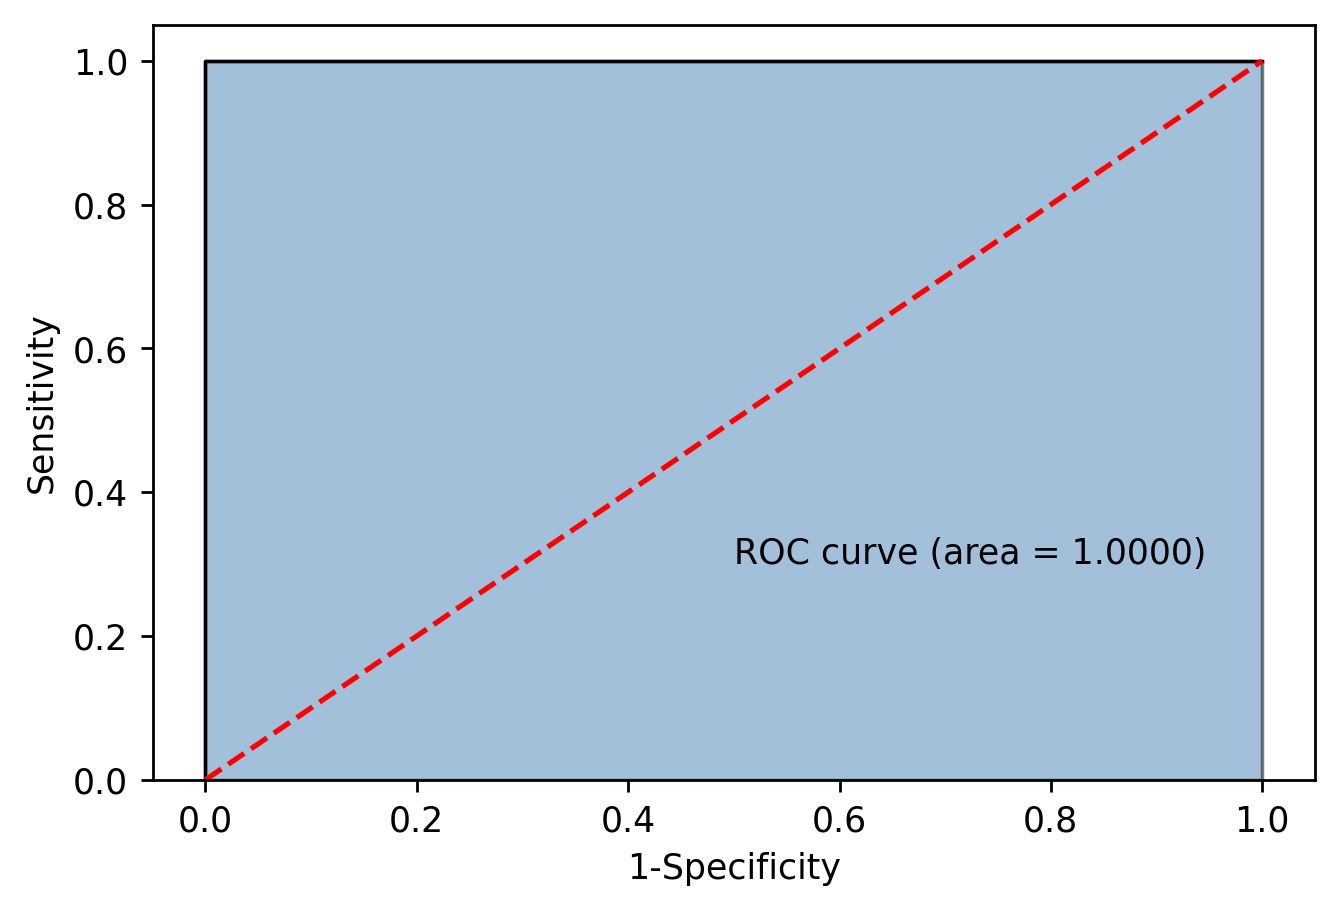

In [9]:
P = vote2.predict_proba(x)[:, 1]
fpr,tpr,threshold = metrics.roc_curve(y,P)
# 计算AUC的值
roc_auc = metrics.auc(fpr,tpr)

#绘制面积图
plt.figure(figsize=(6,4),dpi=250)
plt.stackplot(fpr,tpr,color='steelblue',alpha=0.5,edgecolor='black')
# 添加边际线
plt.plot(fpr,tpr,color='black',lw=1)
# 添加对角线
plt.plot([0,1],[0,1],color='red',linestyle='--')
# 添加文本信息
plt.text(0.5,0.3,'ROC curve (area = %0.4f)' % roc_auc,fontsize=10)
# 添加x轴坐标与y轴坐标
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

fpr,tpr,threshold = metrics.roc_curve(y,P)
# 计算AUC的值
print('AUC的值为：',roc_auc)
# plt.savefig('./latex/img/1/AUC.png')
plt.show()

In [12]:
data_pred = pd.read_excel('excel/extract/3/pred.xlsx')
data_pred = data_pred.fillna(0)
data_pred.head()


,文物编号,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,A1,0,78.45,0.0,0.00,6.08,1.86,7.23,2.15,2.11,0.00,0.00,1.06,0.03,0.00,0.51
1,A2,1,37.75,0.0,0.00,7.63,0.00,2.33,0.00,0.00,34.30,0.00,14.27,0.00,0.00,0.00
2,A3,0,31.95,0.0,1.36,7.19,0.81,2.93,7.06,0.21,39.58,4.69,2.68,0.52,0.00,0.00
3,A4,0,35.47,0.0,0.79,2.89,1.05,7.07,6.45,0.96,24.28,8.31,8.45,0.28,0.00,0.00
4,A5,1,64.29,1.2,0.37,1.64,2.34,12.75,0.81,0.94,12.23,2.16,0.19,0.21,0.49,0.00


In [14]:
x_pred = data_pred.loc[:, '表面风化':'二氧化硫(SO2)']
print(x_pred)
print(x_pred.shape)

   表面风化  二氧化硅(SiO2)  氧化钠(Na2O)  氧化钾(K2O)  氧化钙(CaO)  氧化镁(MgO)  氧化铝(Al2O3)  \
0     0       78.45        0.0      0.00      6.08      1.86        7.23   
1     1       37.75        0.0      0.00      7.63      0.00        2.33   
2     0       31.95        0.0      1.36      7.19      0.81        2.93   
3     0       35.47        0.0      0.79      2.89      1.05        7.07   
4     1       64.29        1.2      0.37      1.64      2.34       12.75   
5     1       93.17        0.0      1.35      0.64      0.21        1.52   
6     1       90.83        0.0      0.98      1.12      0.00        5.06   
7     0       51.12        0.0      0.23      0.89      0.00        2.12   

   氧化铁(Fe2O3)  氧化铜(CuO)  氧化铅(PbO)  氧化钡(BaO)  五氧化二磷(P2O5)  氧化锶(SrO)  氧化锡(SnO2)  \
0        2.15      2.11      0.00      0.00         1.06      0.03       0.00   
1        0.00      0.00     34.30      0.00        14.27      0.00       0.00   
2        7.06      0.21     39.58      4.69         2.68      0.52      

In [15]:
x_pred = tranfer.transform(x_pred)
print(x_pred.shape)

(8, 15)


In [23]:
y_pred = vote2.predict(x_pred)
print(y_pred)
print(y_pred.shape)
print(sum(y_pred))
pred_label = []
for i in y_pred:
    if i == 0:
        pred_label.append('高钾')
    elif i==1:
        pred_label.append('铅钡')
print(pred_label)

[0 1 1 1 1 0 0 1]
(8,)
5
['高钾', '铅钡', '铅钡', '铅钡', '铅钡', '高钾', '高钾', '铅钡']


In [24]:
data_pred['类型']=pred_label
data_pred.to_excel('./excel/result/3/pred_result.xlsx')
data_pred

,文物编号,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),类型
0,A1,0,78.45,0.0,0.00,6.08,1.86,7.23,2.15,2.11,0.00,0.00,1.06,0.03,0.00,0.51,高钾
1,A2,1,37.75,0.0,0.00,7.63,0.00,2.33,0.00,0.00,34.30,0.00,14.27,0.00,0.00,0.00,铅钡
2,A3,0,31.95,0.0,1.36,7.19,0.81,2.93,7.06,0.21,39.58,4.69,2.68,0.52,0.00,0.00,铅钡
3,A4,0,35.47,0.0,0.79,2.89,1.05,7.07,6.45,0.96,24.28,8.31,8.45,0.28,0.00,0.00,铅钡
4,A5,1,64.29,1.2,0.37,1.64,2.34,12.75,0.81,0.94,12.23,2.16,0.19,0.21,0.49,0.00,铅钡
5,A6,1,93.17,0.0,1.35,0.64,0.21,1.52,0.27,1.73,0.00,0.00,0.21,0.00,0.00,0.00,高钾
6,A7,1,90.83,0.0,0.98,1.12,0.00,5.06,0.24,1.17,0.00,0.00,0.13,0.00,0.00,0.11,高钾
7,A8,0,51.12,0.0,0.23,0.89,0.00,2.12,0.00,9.01,21.24,11.34,1.46,0.31,0.00,2.26,铅钡
